✅ Data Imported
                                              review sentiment
0  One of the other reviewers has mentioned that ...  positive
1  A wonderful little production. <br /><br />The...  positive
2  I thought this was a wonderful way to spend ti...  positive
3  Basically there's a family where a little boy ...  negative
4  Petter Mattei's "Love in the Time of Money" is...  positive

Columns: Index(['review', 'sentiment'], dtype='object')
Epoch 1/10
63/63 [==============================] - 4s 35ms/step - loss: 0.6862 - accuracy: 0.6390 - val_loss: 0.6730 - val_accuracy: 0.7099
Epoch 2/10
63/63 [==============================] - 2s 31ms/step - loss: 0.6395 - accuracy: 0.7417 - val_loss: 0.5962 - val_accuracy: 0.7648
Epoch 3/10
63/63 [==============================] - 2s 30ms/step - loss: 0.5347 - accuracy: 0.8068 - val_loss: 0.4827 - val_accuracy: 0.8311
Epoch 4/10
63/63 [==============================] - 2s 31ms/step - loss: 0.4267 - accuracy: 0.8476 - val_loss: 0.4011 - val_ac

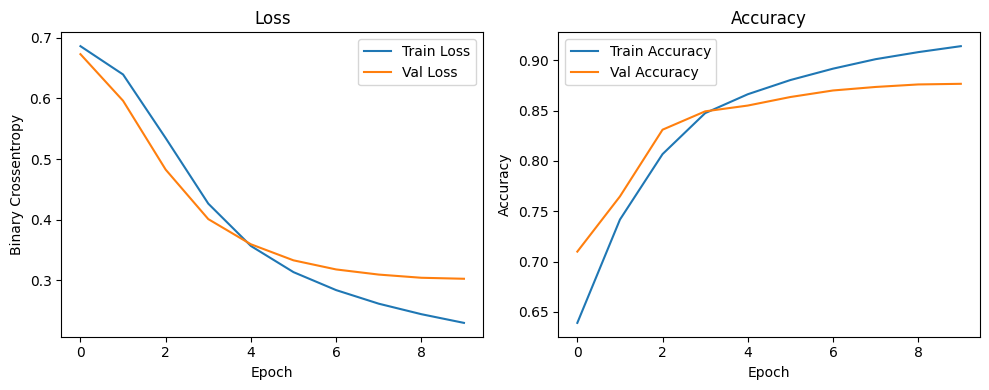

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, GlobalAveragePooling1D
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

# ----- 1. Load and Display CSV Data -----
df = pd.read_csv("IMDB Dataset.csv")  # replace with your actual file path
print("✅ Data Imported")
print(df.head())
print("\nColumns:", df.columns)

# ----- 2. Preprocess Text and Labels -----
# Drop missing values
df.dropna(inplace=True)

# Encode sentiment labels (if they're in text like "positive"/"negative")
if df['sentiment'].dtype == 'object':
    le = LabelEncoder()
    df['sentiment'] = le.fit_transform(df['sentiment'])  # positive -> 1, negative -> 0

# Tokenize the text
tokenizer = Tokenizer(num_words=10000, oov_token="<OOV>")
tokenizer.fit_on_texts(df['review'].values)
sequences = tokenizer.texts_to_sequences(df['review'].values)
padded = pad_sequences(sequences, maxlen=200, padding='post', truncating='post')

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    padded, df['sentiment'].values, test_size=0.2, random_state=42
)

# ----- 3. Build DNN Model -----
model = Sequential([
    Embedding(input_dim=10000, output_dim=32, input_length=200),
    GlobalAveragePooling1D(),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')  # Binary output
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# ----- 4. Train the Model -----
history = model.fit(
    X_train, y_train,
    epochs=10,
    batch_size=512,
    validation_split=0.2,
    verbose=1
)

# ----- 5. Evaluate the Model -----
loss, acc = model.evaluate(X_test, y_test, verbose=1)
print(f"\n✅ Test Accuracy: {acc*100:.2f}%")

# ----- 6. Plot Accuracy and Loss -----
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title("Loss")
plt.xlabel("Epoch")
plt.ylabel("Binary Crossentropy")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title("Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()

plt.tight_layout()
plt.show()
